In [193]:
# 로지스틱 회귀분석 예제 - 성별(Sex), 나이(Age), 객실등급(Pclass), 요금(Fare)이 생존에 어느 정도의 영향을 미쳤는가?
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name() # 한글 처리
rc('font', family=font_name)

In [194]:
df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [195]:
print(df.columns)
print()
print(df.shape)
print()
print(df.describe())

Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

(891, 10)

         Survived     Pclass1     Pclass2     Pclass3        male      female  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    0.242424    0.206510    0.551066    0.647587    0.352413   
std      0.486592    0.428790    0.405028    0.497665    0.477990    0.477990   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
75%      1.000000    0.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Age       SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  891.000000  
mean    29.75

In [196]:
# 생존 여부를 기준으로 한 평균값들
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

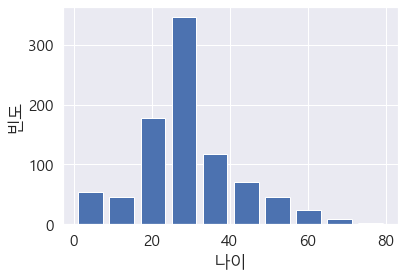

In [197]:
df["Age"].hist(rwidth=0.8)
plt.xlabel('나이')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

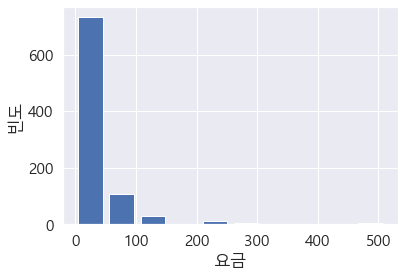

In [198]:
df["Fare"].hist(rwidth=0.8)
plt.xlabel('요금')
plt.ylabel('빈도')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

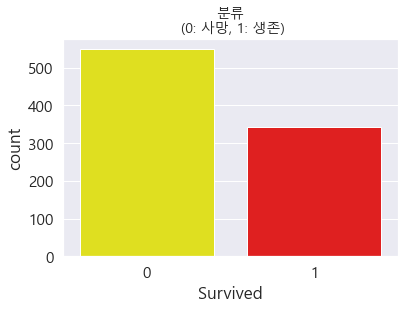

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

colors=['yellow','red']
sns.countplot('Survived', data=df, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)
# 불균형 데이터셋

In [200]:
from sklearn.model_selection import train_test_split

train_cols=df.columns[1:]

X=df[train_cols]
y=df["Survived"]

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [201]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Survived'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [202]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
X_sample, y_sample=SMOTE(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Survived'])
df2=pd.concat([X_samp,y_samp], axis=1)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

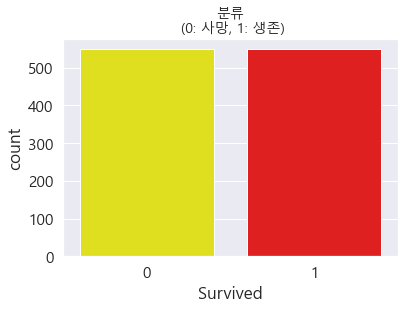

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

colors=['yellow','red']
sns.countplot('Survived', data=df2, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)

In [204]:
train_cols=df.columns[1:]

X=X_samp[train_cols]
y=y_samp["Survived"]

In [205]:
import statsmodels.api as sm

model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 모델의 설명력 35.1%
# Parch는 유의하지 않음
# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.
# 성별 : 여성이 남성보다 생존 확률이 높았다.

Optimization terminated successfully.
         Current function value: 0.450132
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.351      
Dependent Variable: Survived         AIC:              1006.4895  
Date:               2021-12-08 20:09 BIC:              1051.5008  
No. Observations:   1098             Log-Likelihood:   -494.24    
Df Model:           8                LL-Null:          -761.08    
Df Residuals:       1089             LLR p-value:      4.1907e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
--------------------------------------------------------------------
Pclass1     2.2377     0.3859    5.7985   0.0000    1.4813    2.9940
Pclass2     1.6164     0.3309    4.8854   0.0

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [207]:
print('학습용 :',model.score(X_train, y_train))
print('검증용 :',model.score(X_test, y_test))

학습용 : 0.8177676537585421
검증용 : 0.8090909090909091


In [208]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[93, 19],
       [23, 85]], dtype=int64)

In [209]:
df_cm=pd.DataFrame(cm, index=['사망','생존'], columns=['사망','생존'])
df_cm

,사망,생존
사망,93,19
생존,23,85


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\anaconda3\lib\site-pack

<AxesSubplot:title={'center':'Confusion Matrix'}>

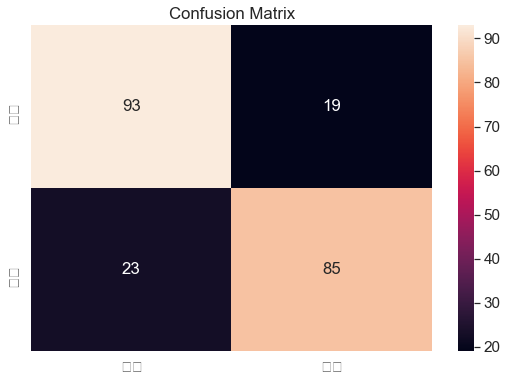

In [210]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True)

In [211]:
# 새로운 값 예측
# 1등석, 2등석, 3등석, 남성, 여성, 나이, 형제/자매, 부모/자식, 요금
import numpy as np
person1=np.array([0,0,1,1,0,19,1,0,50]).reshape(1,9) # 3등석, 남성, 19세, 형제/자매 1명, 요금 50
person2=np.array([1,0,0,0,1,17,0,2,30]).reshape(1,9) # 1등석, 여성, 17세, 부모/자식 2명, 요금 30
person3=np.array([0,1,0,0,1,40,2,0,70]).reshape(1,9) # 2등석, 여성, 40세, 형제/자매 2명, 요금 70
print(model.predict(person1)) # 사망
print(model.predict(person2)) # 생존
print(model.predict(person3)) # 생존

[0]
[1]
[1]


In [212]:
import joblib
joblib.dump(model, 'd:/data/titanic/titanic_logit.model')

['d:/data/titanic/titanic_logit.model']